# Basic Multi Layer Perceptron (MLP) Neural Network

In [1]:
import numpy as np
import os

from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense
from keras.datasets import mnist

import cv2

import matplotlib.pyplot as plt

In [2]:
# !wget https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz

In [3]:
# load mnist dataset
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data(path='../datasets/mnist.npz')

In [4]:
# dataset shapes
print('Train data shape:', x_train_org.shape)
print('Test  data shape:', x_test_org.shape)

Train data shape: (60000, 28, 28)
Test  data shape: (10000, 28, 28)


Number =  5


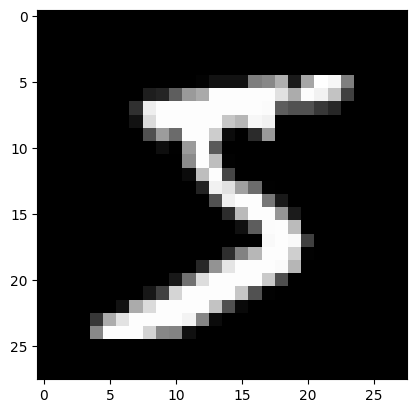

In [5]:
# preview image
print('Number = ', y_train_org[0])
plt.imshow(x_train_org[0], cmap='gray')

In [6]:
# Shrink image size
im_size = 6
x_train_conv = [cv2.resize(img, dsize=(im_size, im_size)) for img in x_train_org]
x_test_conv = [cv2.resize(img, dsize=(im_size, im_size)) for img in x_test_org]

In [7]:
# new dataset shapes
print('Train data shape:', np.shape(x_train_conv))
print('Test  data shape:', np.shape(x_test_conv))

Train data shape: (60000, 6, 6)
Test  data shape: (10000, 6, 6)


Number =  5


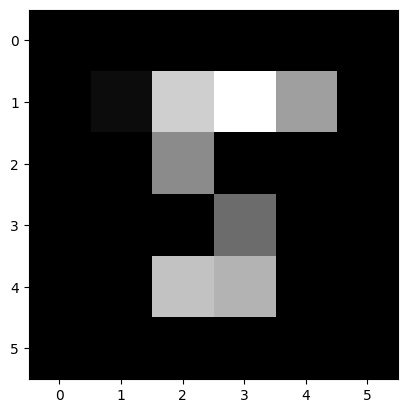

In [8]:
# new dataset element preview
print('Number = ', y_train_org[0])
plt.imshow(x_train_conv[0], cmap='gray')

In [9]:
# Faltten Image (convert matrix to vector)
# Model acceptable shape (number of samples, number of features)
x_train = np.reshape(x_train_conv, [-1, im_size**2])
x_test = np.reshape(x_test_conv, [-1, im_size**2])


In [10]:
# dataset shapes, after flattening images
print('Train data shape:', np.shape(x_train))
print('Test  data shape:', np.shape(x_test))

Train data shape: (60000, 36)
Test  data shape: (10000, 36)


In [11]:
y_train_org.max() + 1

10

In [12]:
# One hot labels to use by model [based on soft max]
y_train = keras.utils.to_categorical(y_train_org, num_classes=10)
y_test = keras.utils.to_categorical(y_test_org, num_classes=10)


In [13]:
y_train[0].argmax()

5

In [14]:
# Normalize data
# use data type = float32 / may study on mixed precison
x_train = x_train.astype('float32') 
x_test = x_train.astype('float32') 

x_train/= 255
x_test/= 255

In [39]:
# Create model architectue
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(36,)))
model.add(Dense(10, activation='softmax'))


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,018 (11.79 KB)

 Trainable params: 3,018 (11.79 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Explain model parameters
# layer 1: current layer neurons * last layer neurons + current layer bias
l1_params = 64 * 36 + 64
print('layer 1 params:', l1_params)

# layer 2: current layer neurons * last layer neurons + current layer bias
l2_params = 10 * 64 + 10
print('layer 2 params:', l2_params )

print('Total params:', l1_params + l2_params )


layer 1 params: 2368
layer 2 params: 650
Total params: 3018


In [21]:
# Compile Model

In [22]:
# Fit (learn) model